## データの可視化について
## 棒グラフ,円グラフ,積み上げ棒グラフ編



### データの取り込み

ポケモンのデータセットを取り込む(https://www.kaggle.com/abcsds/pokemon#Pokemon.csv)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 

pkmn = pd.read_csv('./input/Pokemon.csv') 

In [39]:
pkmn.head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


- #: ID for each pokemon
- Name: Name of each pokemon
- Type 1: Each pokemon has a type, this determines weakness/resistance to attacks
- Type 2: Some pokemon are dual type and have 2
- Total: sum of all stats that come after this, a general guide to how strong a pokemon is
- HP: hit points, or health, defines how much damage a pokemon can withstand before fainting
- Attack: the base modifier for normal attacks (eg. Scratch, Punch)
- Defense: the base damage resistance against normal attacks
- SP Atk: special attack, the base modifier for special attacks (e.g. fire blast, bubble beam)
- SP Def: the base damage resistance against special attacks
- Speed: determines which pokemon attacks first each round
- Generation: Number of generation
- Legendary: True if Legendary Pokemon False if not (more revision on mythical vs legendary needed)

In [40]:
pkmn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 13 columns):
#             800 non-null int64
Name          800 non-null object
Type 1        800 non-null object
Type 2        414 non-null object
Total         800 non-null int64
HP            800 non-null int64
Attack        800 non-null int64
Defense       800 non-null int64
Sp. Atk       800 non-null int64
Sp. Def       800 non-null int64
Speed         800 non-null int64
Generation    800 non-null int64
Legendary     800 non-null bool
dtypes: bool(1), int64(9), object(3)
memory usage: 75.9+ KB


### 棒グラフによるデータの可視化

棒グラフでは、複数並んだ棒の高さを比べて「棒が大きい（小さい）項目はどれだろう？」と考えることができる。  
つまり棒グラフが一番得意な表現方法はデータの「比較」であり、棒グラフを使えば、比べたいデータを最もわかりやすく図で表現できる。

#### pandas.DataFrame.plotを用いた場合

世代ごとのHPの分布の比較を行う

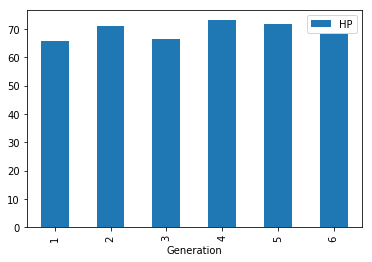

In [42]:
pkmn.groupby("Generation").mean().plot.bar(y="HP")#データの作成及びx軸,y軸の設定

指定されたカテゴリに含まれるデータがいくつあるかカウントし表示する

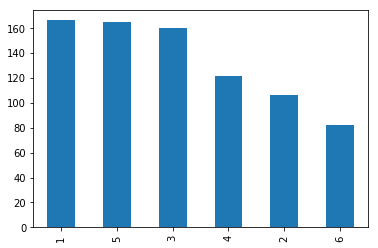

In [37]:
pkmn["Generation"].value_counts().plot.bar(x="Generation")#データの作成及びx軸,y軸の設定

【参考】  
pandas.DataFrame.plot.barについて(公式):https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.plot.bar.html

#### matplotlibを用いた場合

世代ごとのHPの分布の比較を行う

<BarContainer object of 6 artists>

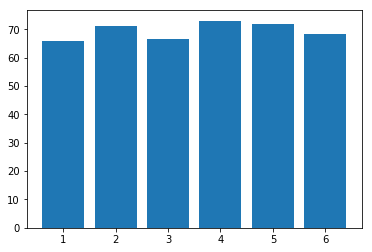

In [35]:
avg=pkmn.groupby("Generation").mean() #描画するデータの作成
plt.bar(avg.index,avg["HP"]) #x軸,y軸の設定

【参考】  
matplotlib.pyplot.barについて(公式):https://matplotlib.org/3.1.0/api/_as_gen/matplotlib.pyplot.bar.html

#### seabornを用いた場合

2変数間の相関を見たい場合はseabornを用いて可視化をするとよい

##### 1.barplotによる可視化


世代ごとのHPの分布の比較を行う

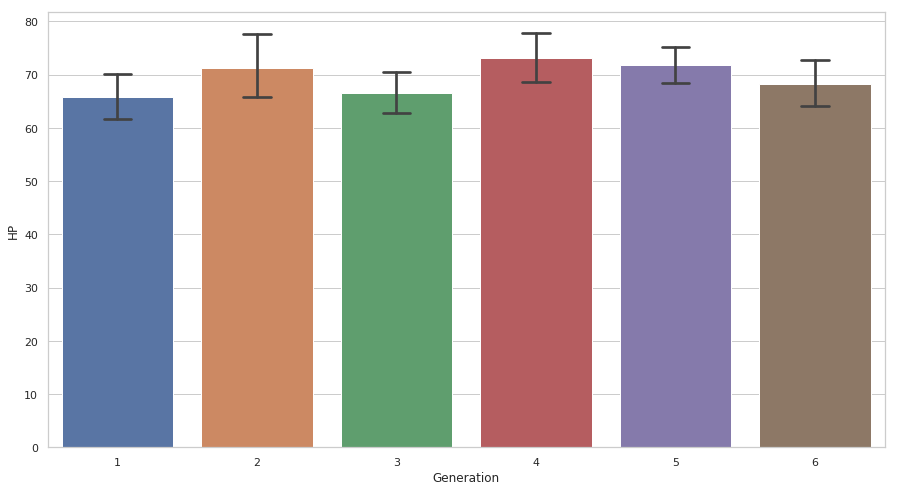

In [47]:
plt.figure(figsize=(15, 8)) #描画領域のサイズ調整

sns.barplot(x=pkmn["Generation"], y =pkmn["HP"],  capsize=.2) #x軸,y軸の設定

y軸は数多くのレコードが存在するため、y軸で使われる数字は各レコードの平均値となる。

デフォルトで平均値からのエラーバーが付与される。
シリーズ全般を通じて、草タイプのポケモンのHPの平均は低めという傾向が読み取れる。  
("データ可視化_箱ひげ図.ipynb"の"【補足】箱ひげ図からの派生グラフ/5.pointplot"によって可視化された情報と同じである)

【参考】  
barplotの使い方(公式):https://seaborn.pydata.org/generated/seaborn.barplot.html

##### 2.countplotによる可視化
指定されたカテゴリに含まれるデータがいくつあるかカウントし表示する

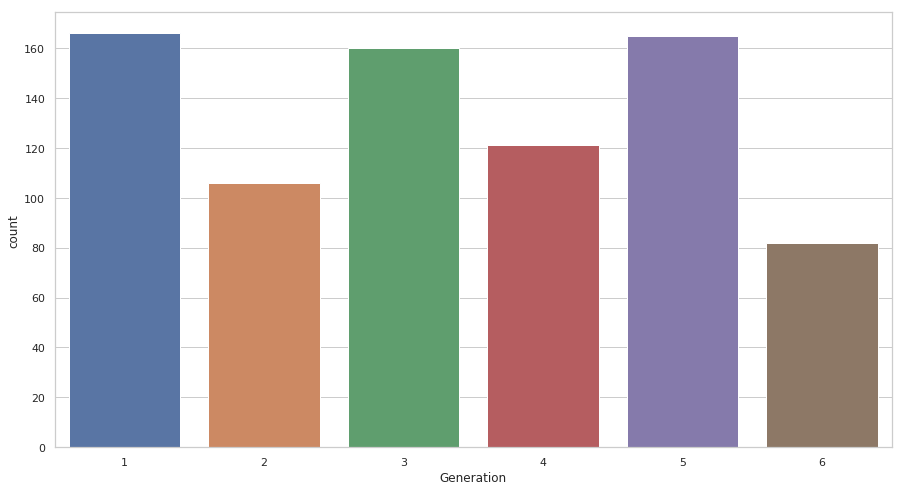

In [48]:
plt.figure(figsize=(15, 8)) #描画領域のサイズ調整

sns.countplot(x=pkmn["Generation"]) #x軸の設定

上記例では世代毎のデータ数（つまりポケモン数）が棒グラフになっている

pandas.DataFrame.plotは描画のみを行うため、事前に自分が表示させたい統計量を計算する必要がある  
一方,seabornによる描画は描画する際に統計量(平均値など)の計算を行ってくれるため非常に便利である

### 円グラフによるデータの可視化

複数項目の割合を示すために用いる。  
なお円グラフの描画機能はseabornでは提供していない

#### pandas.DataFrame.plot.を用いた場合

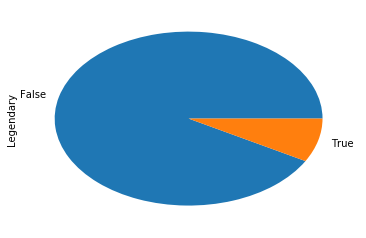

In [20]:
pkmn['Legendary'].value_counts().plot.pie() #描画対象のデータ設定

pandas.DataFrame.plot.pieはあまりオプションがないため、図を細かくカスタマイズすることができない

【参考】  
pandas.DataFrame.plot.pieについて(公式):https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.plot.pie.html

#### matplotlibを用いた場合

([<matplotlib.patches.Wedge at 0x7f2ace306da0>,
 [Text(0.556223,0.949008,'Legendary'),
  Text(-0.606789,-1.03528,'Non Legendary')],
 [Text(0.303394,0.517641,'8.1%'), Text(-0.35396,-0.603914,'91.9%')])

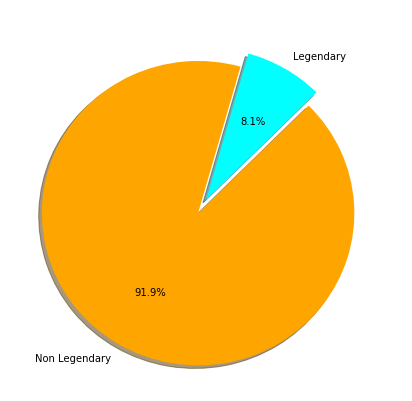

In [6]:
fig = plt.figure(figsize=(7,7)) #描画領域のサイズ調整

colours = ["aqua", "orange"] #色の設定

#項目の用意
pokeLeg = pkmn[pkmn['Legendary']==True] 
pokeNon = pkmn[pkmn['Legendary']==False]
legDist = [pokeLeg['Name'].count(),pokeNon['Name'].count()]

plt.pie(legDist, #描画対象のデータを配列で指定
        labels= ['Legendary', 'Non Legendary'], #各要素のラベル
        autopct ='%1.1f%%',  #構成割合をパーセンテージで表示するかどうかの指定
        shadow = True, #グラフに影を描画するかどうかの指定
        colors=colours, #各要素の色を指定
        startangle = 45, #各要素の出力を開始する角度を指定
        explode=(0, 0.1)) #各要素を中心から話して目立つように表示することの指定(この例では2番目の要素を中心から離して描画)

【参考】  
matplotlib.pyplot.pie について(公式):https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.pie.html  
matplotlib.pyplot.pie について:https://pythondatascience.plavox.info/matplotlib/%E5%86%86%E3%82%B0%E3%83%A9%E3%83%95

### 積み上げ棒グラフによるデータの可視化

複数項目の割合を示すために用いる。  
なお円グラフの描画機能はseabornでは提供していないため、pandas.DataFrameのplot関数およびmatplotlibを用いた例を示す

#### pandas.DataFrame.plotを用いた場合

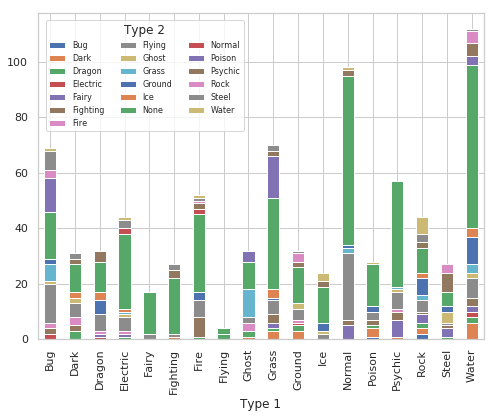

In [129]:
#データの準備
pkmn["Type 2"] = pkmn["Type 2"].fillna("None")
type_cross = pd.crosstab(pkmn["Type 1"], pkmn["Type 2"]) #Type1およびType2のクロス集計(出現回数)の算出

type_cross.plot.bar(stacked=True, figsize=(8,6)) #stacked=Trueとすることで積み上げ棒グラフを描画することができる
plt.legend(bbox_to_anchor=(0.01, 0.99), loc='upper left', ncol=3, fontsize=8, title="Type 2") #凡例の描画設定

上記例はType1およびType2の組み合わせの分布を可視化したものである

【参考】  
pandas.DataFrame.plot.barについて(公式):https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.plot.bar.html  
ポケモンデータセットを使った解析について:http://rautaku.hatenablog.com/entry/2017/12/15/211915

#### matplotlibを用いた場合
matplotlibを用いると凡例をグラフの外に配置することが可能である
ただしpandas.DataFrame.plotとは異なりひと手間加える必要がある

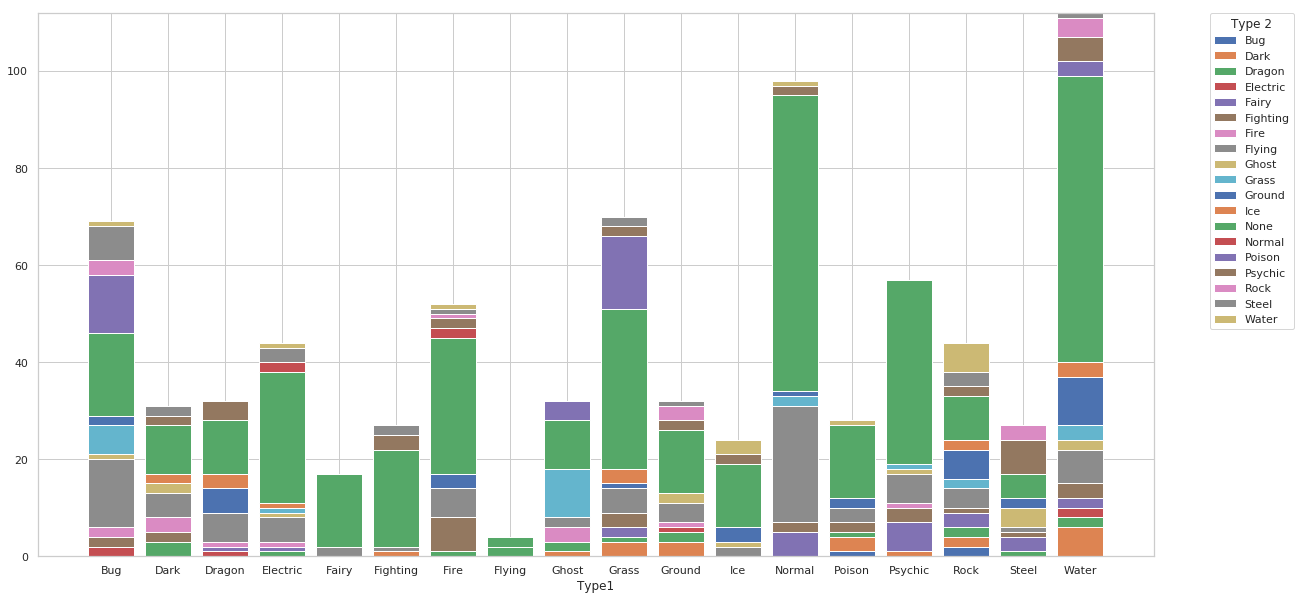

In [161]:
bottom = 0
fig = plt.figure(figsize=(20,10)) #描画領域のサイズ調整

#データの準備
pkmn["Type 2"] = pkmn["Type 2"].fillna("None")
type_cross = pd.crosstab(pkmn["Type 1"], pkmn["Type 2"]) #Type1およびType2のクロス集計(出現回数)の算出

for i in range(0, pkmn["Type 2"].drop_duplicates().size):
    plt.bar(type_cross.index, type_cross.iloc[:, i], label=type_cross.columns[i],bottom=bottom) #各タイプごとにplt.bar()で棒グラフを作り、その下端をbottom=で持ち上げる
    bottom += type_cross.iloc[:, i]
    
plt.xlabel("Type1")
plt.legend(title=type_cross.columns.name,
          bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)#凡例をつける

【参考】  
matplotlib.pyplot.barについて(公式):https://matplotlib.org/3.1.0/api/_as_gen/matplotlib.pyplot.bar.html  
クロス集計について:https://note.nkmk.me/python-pandas-crosstab/  
matplotlibで積み上げ棒グラフを描いてみる:https://qiita.com/s_fukuzawa/items/6f9c1a3d4c4f98ae6eb1